In [57]:
%pylab inline
import pandas as pd
import os
import matplotlib.pyplot as  plt

Populating the interactive namespace from numpy and matplotlib


Setting up the env variable

In [58]:
puidata = os.getenv("PUIDATA")
if puidata is None:
    os.environ["PUIDATA"] = "%s/PUIdata"%os.getenv("HOME")
    puidata = os.getenv("PUIDATA")

Import the csv file

In [59]:
sat = pd.read_csv('https://data.cityofnewyork.us/api/views/f9bf-2cp4/rows.csv?accessType=DOWNLOAD')

Display first 7 rows

In [60]:
sat.head(n=7)

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384
5,01M515,LOWER EAST SIDE PREPARATORY HIGH SCHOOL,112,332,557,316
6,01M539,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",159,522,574,525


Drop all columns but two numeric ones

In [61]:
sat_drop = sat.drop(['DBN','SCHOOL NAME','Num of SAT Test Takers','SAT Critical Reading Avg. Score'], axis=1)

Display first 7 rows

In [62]:
sat_drop.head(7)

,SAT Math Avg. Score,SAT Writing Avg. Score
0,404,363
1,423,366
2,402,370
3,401,359
4,433,384
5,557,316
6,574,525


Gettin ready to plot. Drop cells that contain letter.

In [63]:
sat_drop = sat_drop[sat_drop['SAT Math Avg. Score'] != 's']
sat_drop = sat_drop[sat_drop['SAT Writing Avg. Score'] != 's']

Realized that the number in the dataframe isn't really numeric. Therefore, they needed to be converted to numeric.

In [64]:
sat_drop['SAT Math Avg. Score'] = pd.to_numeric(sat_drop['SAT Math Avg. Score'])
sat_drop['SAT Writing Avg. Score'] = pd.to_numeric(sat_drop['SAT Writing Avg. Score'])

Finally, plot.

Text(0,0.5,'SAT Writing Avg. Score')

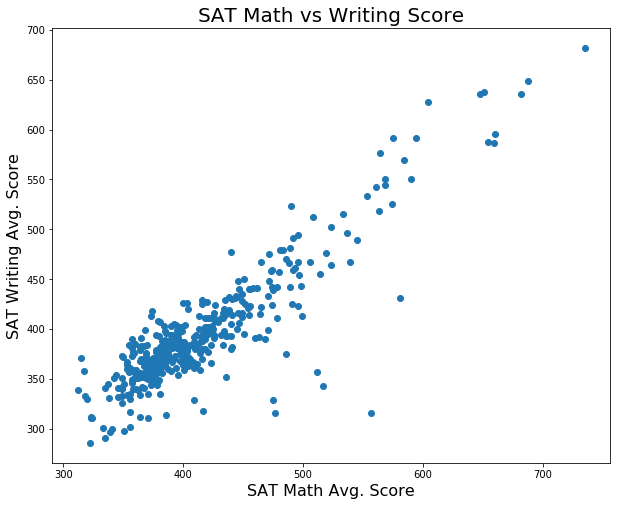

In [65]:
plt.figure(figsize=(10,8))
plt.scatter(sat_drop['SAT Math Avg. Score'], sat_drop['SAT Writing Avg. Score'])
plt.title('SAT Math vs Writing Score', fontsize = 20)
plt.xlabel('SAT Math Avg. Score', fontsize = 16)
plt.ylabel('SAT Writing Avg. Score', fontsize = 16)

## Caption
The scatter graph shows a positive relationship between math score and writing score, indicating that higher math score will suggest a higher writing score, vice versa.